# covid-19 crisis

The world is still struggling with one of the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight." Imagine that you are one of the best data scientists in your country. 

As the world grapples with the challenges posed by the COVID-19 pandemic, understanding the intricacies of the virus's spread and its effects on various demographics becomes crucial in formulating effective response strategies. South Korea, given its proximity to the initial outbreak and its robust healthcare system, offers valuable insights into the pandemic's progression and containment.

The provided dataset encompasses detailed patient-level data from South Korea, shedding light on various aspects of the pandemic — from the source of infection to the time it took for symptom onset and subsequent confirmation. Covering a range of provinces and cities, the data encapsulates diverse demographics, allowing for a comprehensive analysis that can aid in formulating targeted response strategies.

With parameters such as age, gender, infection source, and days between symptom onset and confirmation, this analysis seeks to unearth patterns, identify at-risk demographics, and gauge the effectiveness of existing measures. By leveraging this data, our aim is to fortify our homeland's preparedness for potential subsequent waves and refine our approach in the ongoing "Corona Fight."



**Source of data:** [KCDC (Korea Centers for Disease Control & Prevention](https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset)

In [1]:
# Importing libraries

from my_func import *
from collections import Counter
import re

pd.set_option('display.float_format', '{:.0f}'.format)

In [2]:
# Print out the available datasets

In [3]:
ls datasets/covid

Case.csv           Region.csv         Time.csv           TimeProvince.csv
PatientInfo.csv    SearchTrend.csv    TimeAge.csv        Weather.csv
Policy.csv         SeoulFloating.csv  TimeGender.csv


In [4]:
# Import Patient Level dataset. 

df = pd.read_csv('datasets/covid/PatientInfo.csv')
df.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
df.shape[0], df.shape[1]

(5165, 14)

In [6]:
# Printing out different columns
df.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [7]:
# Changing columns names
df.columns = ['ID', 'Sex', 'Age', 'Country', 'Province', 'City', 'Infection Case', 'Infected By', 'Contact Number',
             'Symptom Onset Date', 'Confirmed Date', 'Released Date', 'Deceased Date', 'State']

#### Key Variables Included:

* Personal Information: Includes patient ID, gender, age, country of residence, and specific location data (province and city).
* Infection Details: Captures the source of the infection, whether it was an overseas inflow, contact with an existing patient, or other categories. Also includes specific details on which patient an individual was infected by (if applicable) and the number of contacts they had.
* Medical Timeline: Details symptom onset date, the date of confirmation, the date of release (recovery), and the date of decease (if applicable).
* State: Captures the current health state of the patient, such as isolated, released, or deceased.
* Derived Metrics: These metrics include days between symptom onset and confirmation, days between confirmation and release, and days between confirmation and decease.

### Cleaning Data

In [8]:
df.dtypes

ID                     int64
Sex                   object
Age                   object
Country               object
Province              object
City                  object
Infection Case        object
Infected By           object
Contact Number        object
Symptom Onset Date    object
Confirmed Date        object
Released Date         object
Deceased Date         object
State                 object
dtype: object

In [9]:
# Define data types

df[['Sex', 'Country', 'Province', 'City', 'Infection Case', 'State']] = df[['Sex', 'Country', 'Province', 'City', 'Infection Case', 'State']].astype("string")

In [10]:
# Check missing values

df.isnull().sum()

ID                       0
Sex                   1122
Age                   1380
Country                  0
Province                 0
City                    94
Infection Case         919
Infected By           3819
Contact Number        4374
Symptom Onset Date    4475
Confirmed Date           3
Released Date         3578
Deceased Date         5099
State                    0
dtype: int64

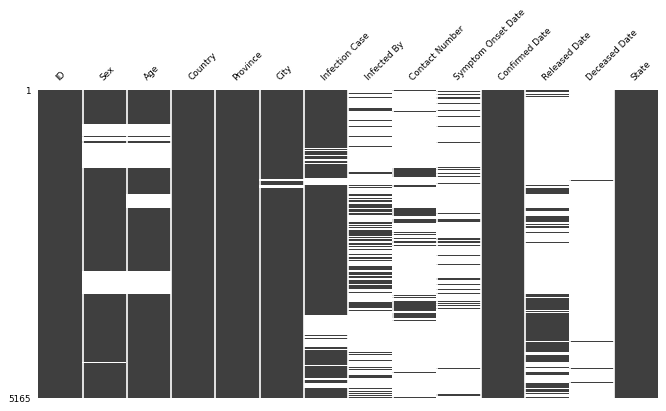

In [11]:
# Visualize missingness with modified missingno library matrix function

fig, ax = plt.subplots(figsize=(10, 5))
missing_matrix(df, ax=ax, sparkline=False)
plt.show()

In [12]:
# EXPLICACION MISSING VALUES

#### Data Cleaning

* Handling Missing Values
* Date Conversion
* Categorization

In [13]:
# We will first handle missing cities finding the most common 
# city within the same province, country and state
# Applying the function to fill missing city values from my_func.py file

df['City'] = df.apply(
    lambda row: fill_missing_value(row, df, 'City', 
                                   ['Province', 'Country', 'State']), axis=1).astype('string')

In [14]:
# We want to now observe if there is a any correlation between sex and the province feature 
# then we will understand if we can fill in empty values based on known values

categorical_columns = ['Province', 'Country', 'City']
chi2_correlation('Sex', categorical_columns, df)

Province association with Sex - chi2: 51.30874224537161, p-value: 1.4154599552335896e-05
Country association with Sex - chi2: 23.052646378611197, p-value: 0.059418440980756944
City association with Sex - chi2: 256.32464293048196, p-value: 2.5807447933143334e-06


* Province-Sex Association: The p-value (1.4154599552335896e-05) is very small, indicating that there is a statistically significant association between the province and sex of the individuals. This tell us that the distribution of sexes is not the same within all provinces.

* Country-Sex Association: The p-value (0.059418440980756944) is larger than 0.05, we do not have enough evidence to say there is a statistically significant association between the country and the sex of the individuals.

* City-Sex Association: The p-value (2.5807447933143334e-06) is extremely small, indicating a statistically significant association between the city and sex of the individuals. This suggests the distribution of sexes is not the same across all cities.

In [15]:
# we want to now fill in empty sex values based on the city mode

# group the dataframe by 'City' and calculate the mode of the 'Sex' column
mode_by_city = df.groupby('City')['Sex'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# fill in missing values in 'Sex' based on the mode of the corresponding 'City'
df['Sex'] = df.apply(lambda row: mode_by_city[row['City']] if pd.isnull(row['Sex']) else row['Sex'], axis=1).astype('string')

# replace any remaining missing values with the overall mode
mode_sex = df['Sex'].mode()[0]
df['Sex'].fillna(mode_sex, inplace=True)

In [16]:
# we want to now fill in empty age vales based on the city mode.

# group the dataframe by 'province' and calculate the mode of the 'age' column
mode_by_city = df.groupby('City')['Age'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# fill in missing values in 'Sex' based on the mode of the corresponding 'City'
df['Age'] = df.apply(lambda row: mode_by_city[row['City']] if pd.isnull(row['Age']) else row['Age'], axis=1).astype('string')

# replace any remaining missing values with the overall mode
mode_sex = df['Age'].mode()[0]
df['Age'].fillna(mode_sex, inplace=True)

In [17]:
# To handle the infecion case part, I will create a new category to fill in empty spaces for the Unknown ones.
df['Infection Case'] = df['Infection Case'].fillna('Unknown').astype('string')

In [18]:
# we will fill in the infected by values empties with unknown and the na also
# I assume missing values might be unknown by the patient
df['Infected By'] = df['Infected By'].apply(lambda x: convert_to_float(x, 10))

In [19]:
# Replace 'nan' and '-' with actual NaN values
df['Contact Number'] = df['Contact Number'].apply(lambda x: float(np.nan) if x == '-' else x)

In [20]:
df['Contact Number'] = df['Contact Number'].apply(lambda x: convert_to_float(x, 5))

Sympton Onset Date data has a large number of missing values that could tell us that there are many asymptomatic
cases or cases where symptom onset wasn't tracked. 
Since most of the column shows as missing value I will assume that people got tested soon after they start showing symptoms I'm gonna use the confirmed date to fill in the empty values. 

In [21]:
# Fill missing 'Symptom Onset Date' with 'Confirmed Date' for applicable rows
df.loc[df['Symptom Onset Date'].isnull(), 'Symptom Onset Date'] = df.loc[df['Symptom Onset Date'].isnull(), 'Confirmed Date']
df['Symptom Onset Date'] = pd.to_datetime(df['Symptom Onset Date'], errors='coerce', format='%Y-%m-%d')

In [22]:
# We will drop rows with confirmed_date missing data since is just a very little amount
# Drop rows where 'confirmed_date' is missing and convert column to datetime dataframe

df.dropna(subset=['Confirmed Date'], inplace=True)
df['Confirmed Date'] = pd.to_datetime(df['Confirmed Date'], format='%Y-%m-%d')

In [23]:
df['Released Date'] = pd.to_datetime(df['Released Date'], format='%Y-%m-%d')
df['Deceased Date'] = pd.to_datetime(df['Deceased Date'], format='%Y-%m-%d')

### Feature Engineering

Adding new time-related columns.

- Days between symptom onset and confirmation for those that we had data, since the ones that we didn't know we assumed that the patient had no symptons or knowledge of having COVID-19 so the symptons date would be same as the confirmation date. That day we will have insights on which patients had symtoms and when the patient got confirmed at the hospital.

- Days between confirmation and release / decease dates to later on plan a little bit resources with healthcare resource planning.

In [24]:
# Calculation days between symptons onset and confirmation date
df['Days between Symptom Onset and Confirmation'] = (df['Confirmed Date'] - df['Symptom Onset Date']).dt.days

In [25]:
# calculation days between confirmation date and released date 
df['Days between Confirmation and Release'] = (df['Released Date'] - df['Confirmed Date']).dt.days

In [26]:
# calculation days between confirmation date and deceased date 
df['Days between Confirmation and Deceased'] = (df['Deceased Date'] - df['Confirmed Date']).dt.days

In [27]:
# Concatenate all the strings in the 'Infection Case' column into a single text
all_text = ' '.join(df['Infection Case'].astype(str))

# Tokenize the text into individual words
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the frequency of each word
word_freq = Counter(words)

# Sort the words based on their frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [28]:
# Create a new column for the category
df['Infection Case'] = df['Infection Case'].str.lower()
df['Infection Case Category'] = df['Infection Case'].apply(categorize_case)

### Summary Statistics

#### Distribution by Age, Gender & Region

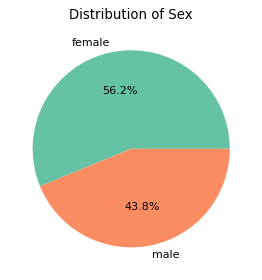

In [29]:
pie_chart(df, 'Sex')

Females had a slighlty higher number of cases than male cases.

In [30]:
# Calculating frequency distributions for categorical columns starting with demographic columns
# Age groups, genders, status of the infection
df['Age'] = df['Age'].str.rstrip('s').astype(int)

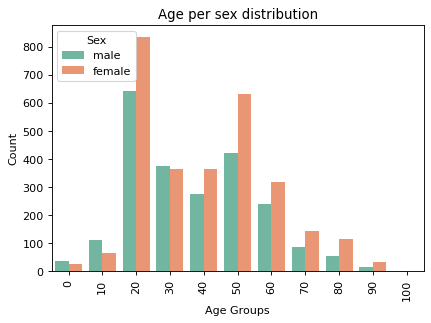

In [31]:
counterplot_hue(df=df, target_column = "Age", hue= "Sex", xlabel = "Age Groups", title="Age per sex distribution")

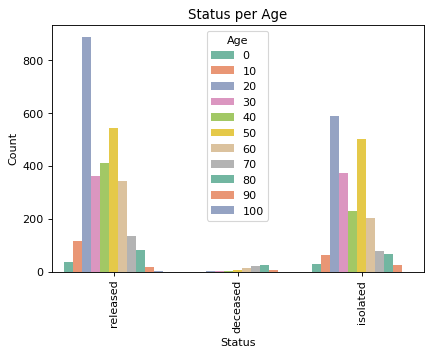

In [32]:
counterplot_hue(df=df, target_column = "State", hue= "Age", xlabel = "Status", title="Status per Age")

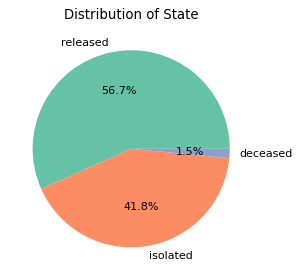

In [33]:
pie_chart(df, 'State')

Visual analysis indicates a concentration of COVID-19 cases among individuals in their 20s to 50s. This demographic may be more exposed due to factors like active work life, social engagements, or higher mobility compared to other age groups. This might also reflect the active testing strategy targeting certain outbreaks or regions where the younger demographic dominates.

While the 20s to 50s age group accounted for the majority of confirmed cases, they don't have a proportional representation in terms of fatalities. A stark contrast can be observed with individuals aged above 50, where the death rate seems disproportionately higher. Alarmingly, there's also a notable mortality among those aged under 10, despite the common perception that younger individuals are less vulnerable to severe outcomes. This emphasizes the need for protective measures across all age groups, not just the elderly.

Consistent with global observations, our data suggests that the age group between 20s and 50s has a higher rate of recovery. This could be indicative of stronger immune responses or milder initial symptoms among this demographic, allowing for quicker and more complete recoveries. It reinforces the understanding that while younger individuals are at risk of contracting the virus, their potential for recovery is promising. Nonetheless, it's imperative not to overlook the risks, especially given the potential long-term effects or complications associated with the virus.

In [34]:
num_deceased = len(df[df['State'] == 'deceased'])
total_confirmed_cases = len(df)
fatality_rate = (num_deceased / total_confirmed_cases) * 100
fatality_rate

1.5110422316931422

In [35]:
num_recovered = len(df[df['State'] == 'released'])
recovery_rate = (num_recovered / total_confirmed_cases) * 100
recovery_rate

56.683456024796584

A fatality rate of 1.51% for COVID-19 in the dataset suggests that out of all confirmed cases, approximately 1.51% have unfortunately resulted in death. While this percentage may seem relatively small at first glance, it's crucial to recognize its significance thus the need for preventive measures, as even a small percentage can translate to significant numbers in densely populated regions or countries.

A recovery rate of 56.68% is more uplifting, indicating that of the confirmed cases, a majority have recovered from the virus. This is a testament to several factors: effective medical treatments and healthcare responses can have a substantial impact in ensuring patient recovery, this is also indicative of the resilience and immune response of many individuals to the virus, especially if earlier findings about the majority of cases being between the 20s and 50s hold true. 56.68% implies that a significant portion (around 42% when excluding the deceased) may still be active cases or in a state of medical uncertainty. This sizable percentage underlines the importance of ongoing medical attention, support, and research into COVID-19's long-term effects

In [36]:
# Create province cases dataframe by grouping province by number of cases
province_cases = df.groupby('Province').size().reset_index(name='Total Cases')
province_cases.at[11, 'Province'] = 'Jeju'

In [37]:
# Import population by regions in South Korea
pop_df = pd.read_csv('datasets/population_density_korea_south_regions.csv')
pop_df.rename(columns={'By administrative divisions' : "Province"}, inplace=True)

In [38]:
# Rename a province name so their are matching
pop_df.at[8, 'Province'] = 'Sejong'
pop_df.at[17, 'Province'] = 'Jeju'
pop_df = pop_df.iloc[1:]
pop_df = pop_df.reset_index(drop=True)

In [39]:
# Merge the province population and province cases datasets by province name
province_cases_population = province_cases.merge(pop_df, on='Province')

# Reset the index to an unified numeration and print it out
province_cases_population.reset_index(drop=True, inplace=True)

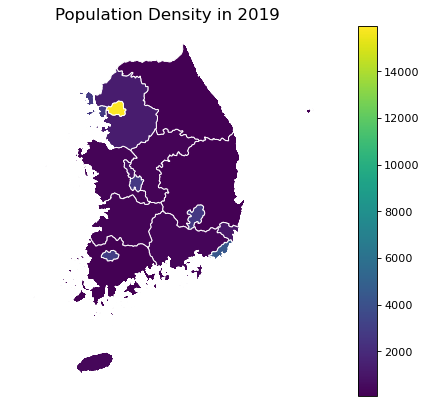

In [40]:
create_map('Province', 'shapefiles/dk009rq9138.shp', '2019', 'Population Density in 2019', province_cases_population)

Checking further the relationship between population density, and the number of cases in different regions.

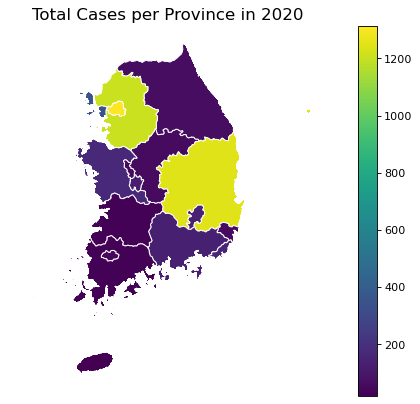

In [41]:
create_map('Province', 'shapefiles/dk009rq9138.shp', 'Total Cases', 'Total Cases per Province in 2020', province_cases_population)

Correlation Coefficient: 0.5089935896636804


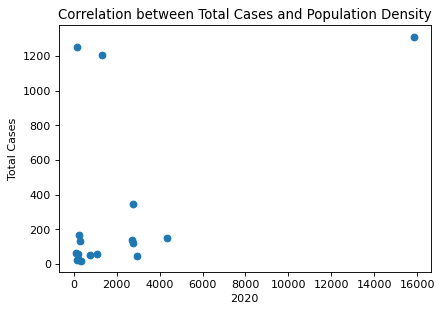

In [42]:
# Calculate the correlation coefficient
correlation = province_cases_population['Total Cases'].corr(province_cases_population['2020'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)

# Plot a scatter plot to visualize the relationship
plt.scatter(province_cases_population['2020'], province_cases_population['Total Cases'])
plt.xlabel('2020')
plt.ylabel('Total Cases')
plt.title('Correlation between Total Cases and Population Density')
plt.show()

Based on the correlation coefficient of 0.5089, there is a moderate positive correlation between the total cases and population density in the given dataset. This means that as the population density in 2019 & 2020, the total number of cases tends to increase as well, and vice versa. 

Calculating the incidence rate for each region by dividing the number of COVID-19 cases by the population size. This will give us a measure of the spread of the virus relative to the population size.

In [43]:
province_cases_population['Incidence Rate'] = province_cases_population['Total Cases'] / (province_cases_population['2019'])

In [44]:
province_cases_population

,Province,Total Cases,2019,2020,2021,Incidence Rate
0,Busan,151,4380,4349,4316,0
1,Chungcheongbuk-do,56,220,220,219,0
2,Chungcheongnam-do,168,265,264,264,1
3,Daegu,137,2750,2729,2702,0
4,Daejeon,119,2778,2758,2743,0
5,Gangwon-do,63,90,90,90,1
6,Gwangju,44,2973,2948,2944,0
7,Gyeonggi-do,1208,1305,1325,1339,1
8,Gyeongsangbuk-do,1251,140,139,138,9
9,Gyeongsangnam-do,133,318,316,314,0


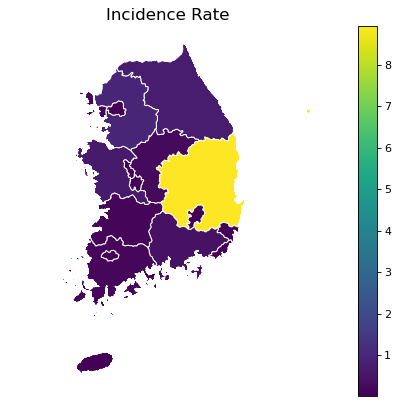

In [45]:
create_map('Province', 'shapefiles/dk009rq9138.shp', 'Incidence Rate', 'Incidence Rate', province_cases_population)

It can be indicative of localized outbreaks or clusters of COVID-19 cases in specific regions. This can lead to a higher incidence rate despite the lower population density.

In [46]:
province_name = 'Gyeongsangbuk-do'  # Province name to filter
outbreak = df.loc[df['Province'] == province_name]

In [47]:
outbreak

,ID,Sex,Age,Country,Province,City,Infection Case,Infected By,Contact Number,Symptom Onset Date,Confirmed Date,Released Date,Deceased Date,State,Days between Symptom Onset and Confirmation,Days between Confirmation and Release,Days between Confirmation and Deceased,Infection Case Category
3758,6001000001,female,20,Korea,Gyeongsangbuk-do,Gyeongsan-si,shincheonji church,1200000031,7,2020-02-19,2020-02-19,2020-04-09,NaT,released,0,50,NaN,Workplace
3760,6001000003,female,40,Korea,Gyeongsangbuk-do,Gyeongsan-si,unknown,NaN,3,2020-02-20,2020-02-20,2020-03-06,NaT,released,0,15,NaN,Unknown
3761,6001000004,female,50,Korea,Gyeongsangbuk-do,Gyeongsan-si,unknown,NaN,5,2020-02-20,2020-02-20,2020-03-25,NaT,released,0,34,NaN,Unknown
3762,6001000005,female,20,Korea,Gyeongsangbuk-do,Gyeongsan-si,unknown,NaN,2,2020-02-20,2020-02-20,2020-03-18,NaT,released,0,27,NaN,Unknown
3763,6001000006,female,40,Korea,Gyeongsangbuk-do,Gyeongsan-si,unknown,NaN,9,2020-02-21,2020-02-21,2020-03-14,NaT,released,0,22,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,6023000049,female,30,Korea,Gyeongsangbuk-do,Pohang-si,unknown,NaN,NaN,2020-03-17,2020-03-17,2020-03-28,NaT,released,0,11,NaN,Unknown
5009,6023000050,male,30,Korea,Gyeongsangbuk-do,Pohang-si,unknown,NaN,NaN,2020-03-29,2020-03-29,2020-05-10,NaT,released,0,42,NaN,Unknown
5010,6023000051,male,20,Korea,Gyeongsangbuk-do,Pohang-si,unknown,NaN,NaN,2020-03-26,2020-03-26,2020-05-14,NaT,released,0,49,NaN,Unknown
5011,6023000052,male,20,Korea,Gyeongsangbuk-do,Pohang-si,unknown,NaN,NaN,2020-04-04,2020-04-04,2020-05-19,NaT,released,0,45,NaN,Unknown


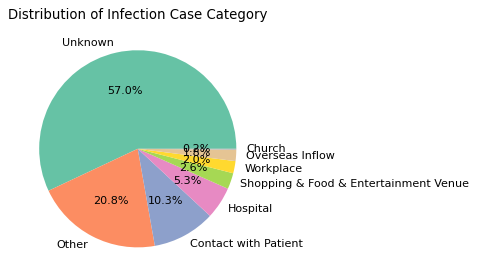

In [48]:
pie_chart(outbreak, 'Infection Case Category')

Among the infection cases in the outbreak province, a significant portion (57%) is categorized as 'Unknown,' indicating that the source of transmission for these cases is yet to be determined. Another substantial proportion (20.8%) falls under the category 'other', which likely encompasses various miscellaneous cases. The remaining cases (22.2%) can be attributed to specific sources, such as religious gatherings (e.g., Shincheonji Church), healthcare facilities (e.g., Gyeongsan Seorin Nursing Home and Cheongdo Daenam Hospital), and other specific locations (e.g., Gyeongsan Cham Joeun Community Center and Pilgrimage to Israel).

#### Contact and infection


In this section we will focus on the analysis of 'infection_case', 'infected_by', and 'contact_number' columns to understand how the virus was spread in the country and if we can detect any super spreader cases, sources of infection, find patterns or contact behaviors. 

In [49]:
df['Contact Number'].describe()

count    784
mean      17
std       68
min        0
25%        2
50%        4
75%       14
max     1160
Name: Contact Number, dtype: float64

The contact number column contains information on the number of contacts associated with COVID-19 cases. On average, each case had around 14 contacts, with a wide range of values from 0 to 485. The data reveals the extent of potential transmission through contact tracing efforts.

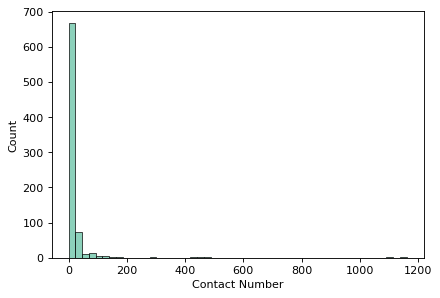

In [50]:
histogram(df, 'Contact Number', bins=50)

Now, we will analyze the 'Contact Number' per province to identify regions with a high number of contacts. This analysis will help us understand if certain regions require more education and preventive measures to reduce contact and curb the spread of COVID-19.

In [51]:
# Calculating the average contactt number for each province
average_contact_number_per_province = df.groupby('Province')['Contact Number'].mean().reset_index()

# Sort the data by the average 'Contact Number' in descending order
average_contact_number_per_province = average_contact_number_per_province.sort_values(by='Contact Number', ascending=False)

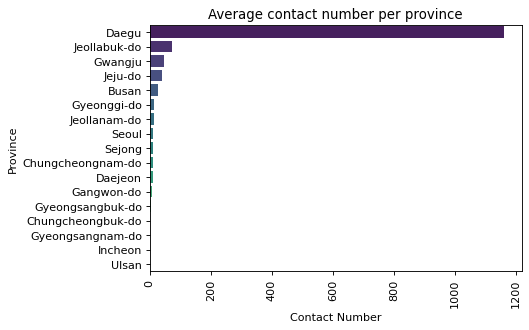

In [52]:
barplot('Contact Number', 'Province', average_contact_number_per_province, 'Average contact number per province')

This analysis examines the average 'Contact Number' for each province, shedding light on potential variations in COVID-19 exposure. Daegu leads with the highest average contact number, while some provinces lack sufficient data. Understanding these patterns can help focus preventive efforts in regions with higher exposure risks as 'Daegu' and
'Jeollabuk-do' in second place but by difference. The region that needs most preventive efforts is Daegu. 

In [53]:
df['Infection Case Category'].unique()

array(['Overseas Inflow', 'Contact with Patient',
       'Shopping & Food & Entertainment Venue', 'Other', 'Hospital',
       'Workplace', 'Church', 'Unknown', 'Admin Centers', 'Education'],
      dtype=object)

In [54]:
# Exclude rows with 'Unknown' in the 'Infection Case' column
known_cases_df = df[df['Infection Case Category'] != 'Unknown']

# Count the occurrences of each infection source
infection_counts = known_cases_df['Infection Case Category'].value_counts()

In [55]:
infection_counts

Contact with Patient                     1610
Overseas Inflow                           840
Other                                     723
Shopping & Food & Entertainment Venue     646
Workplace                                 229
Church                                     91
Hospital                                   83
Admin Centers                              18
Education                                   3
Name: Infection Case Category, dtype: int64

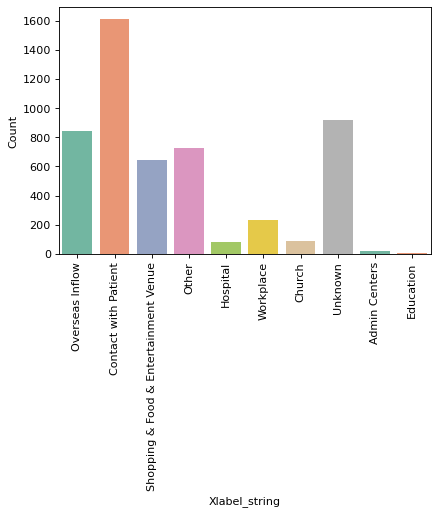

In [56]:
counterplot('Infection Case Category', df, 'xlabel_string')

The analysis of infection cases reveals that the highest number (1610) is due to contact with patients. Additionally, there are 1092 cases classified as "Other," indicating unspecified sources. Overseas inflow accounts for 840 cases, emphasizing the importance of monitoring international travel for disease control.

In [57]:
# Filter out rows with known sources of infection
known_sources_df = df[df['Infected By'].notna()]

# Count the occurrences of each unique source of infection
infection_counts = known_sources_df['Infected By'].value_counts()

In [58]:
infection_counts.describe()

count   605
mean      2
std       3
min       1
25%       1
50%       1
75%       2
max      51
Name: Infected By, dtype: float64

In [59]:
infected_more_than_5 = infection_counts[infection_counts > 2]

# Get the IDs of patients who infected more than 5 people
infected_more_than_5_ids = infected_more_than_5.index.tolist()

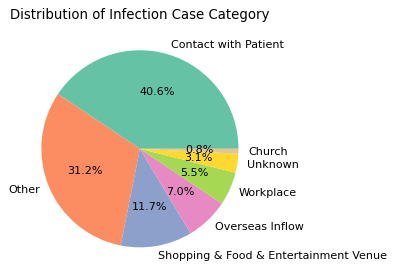

In [60]:
# Create a DataFrame containing only the rows with the selected IDs
selected_rows_df = df[df['ID'].isin(infected_more_than_5_ids)]

pie_chart(selected_rows_df, 'Infection Case Category')

### Growth of cases Over Time

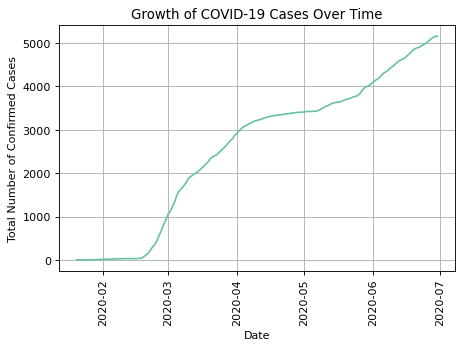

In [67]:
# Group by the 'Confirmed Date' and count the number of cases for each date
cases_by_date = df.groupby('Confirmed Date').size().reset_index(name='Daily Counts')

# Calculate cumulative cases
cases_by_date['Cumulative Cases'] = cases_by_date['Daily Counts'].cumsum()

# Call your function
time_series(cases_by_date, 'Confirmed Date', 'Cumulative Cases', 'Growth of COVID-19 Cases Over Time', 'Total Number of Confirmed Cases')

The data reveals a notable increase in the number of COVID-19 cases between February and March, which indicates the initial phase of rapid spread. This could have been due to multiple reasons such as increased testing, international travel, or local transmission. Interestingly, the growth seems to stabilize during April and May, suggesting possible effectiveness of containment measures, public awareness, or other interventions. However, the uptick in cases again in June and July indicates a potential second wave or resurgence. It is essential to investigate further to understand this rise – whether it's due to easing of lockdown measures, increased testing, or new outbreak clusters.

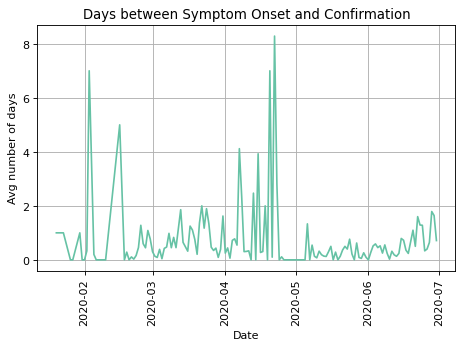

In [69]:
# Symptom Onset to Confirmation date

avg_days_symptons_onset_to_confirmation = df.groupby('Confirmed Date')['Days between Symptom Onset and Confirmation'].mean().reset_index()
time_series(avg_days_symptons_onset_to_confirmation, 
            'Confirmed Date', 'Days between Symptom Onset and Confirmation', 'Days between Symptom Onset and Confirmation', 'Avg number of days')

The pronounced peak between February and March indicates that there was a longer duration between individuals first experiencing symptoms and getting confirmed as COVID-19 positive. This delay could be attributed to limited testing resources, public awareness, or acknowledgment of the disease's severity. The subsequent dip between April and May suggests an improvement in testing turnaround time or better public responsiveness in seeking medical advice.

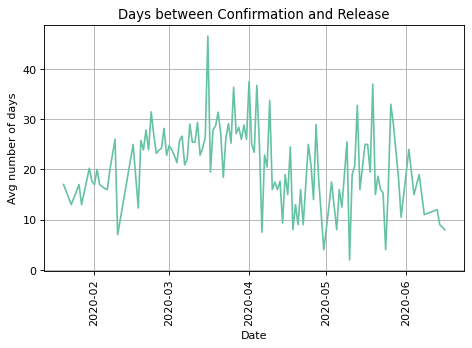

In [73]:
# Confirmation to Release

avg_days_confirmation_to_release = df.groupby('Confirmed Date')['Days between Confirmation and Release'].mean().reset_index()
time_series(avg_days_confirmation_to_release, 
            'Confirmed Date', 'Days between Confirmation and Release', 'Days between Confirmation and Release', 'Avg number of days')

The graph shows a peak between March and April, meaning patients took longer to recover and get released during this period. This could be due to hospitals being overwhelmed or the severity of cases being higher. The subsequent slowdown with intermittent peaks between May and June suggests variability in recovery time, perhaps due to evolving treatment methods or variations in case severity.

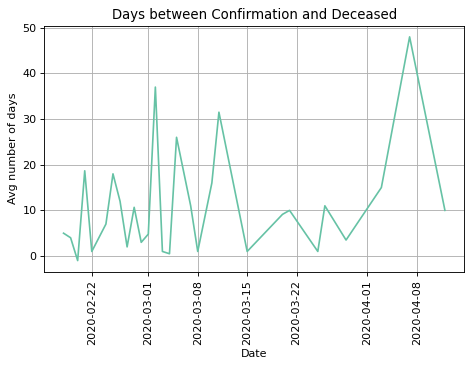

In [74]:
# Confirmation to Decease

avg_days_confirmation_to_deceased = df.groupby('Confirmed Date')['Days between Confirmation and Deceased'].mean().reset_index()
time_series(avg_days_confirmation_to_deceased, 
            'Confirmed Date', 'Days between Confirmation and Deceased', 'Days between Confirmation and Deceased', 'Avg number of days')

A discernible peak in March, followed by a more significant spike in April, indicates that these were particularly challenging months in terms of fatalities. The absence of data post-April suggests one of two things: either there were no more deaths (which would be a positive indicator of effective treatment and intervention strategies) or the data for subsequent months hasn't been recorded or analyzed.

### Conclusion

1. Rapid Case Growth: The noticeable increase in cases between February and March, followed by another surge in June and July, underscores the importance of early detection and swift containment measures. Proactive measures during the early days of an outbreak can prevent the healthcare system from becoming overwhelmed.

2. Symptom Detection to Confirmation: The lag observed between symptom onset and case confirmation during February and March suggests that efficient and accessible testing, combined with public awareness campaigns emphasizing early reporting of symptoms, is crucial.

3. Recovery and Fatality Times: Variations in the time taken for patients to recover or, unfortunately, succumb to the disease suggest that treatment protocols and healthcare interventions need constant evaluation and adaptation. The absence of fatality data post-April might be indicative of effective treatment methods or other mitigating factors and should be studied further for insights.

4. Age and Fatality Correlation: The age distribution of fatalities, being majorly above 50 and below 10, demonstrates the need for targeted protection strategies for vulnerable age groups.

The data underscores the significance of a multi-pronged approach: 

* ramping up testing capabilities
* bolstering healthcare infrastructure
* promoting public awareness
* devising targeted protection for vulnerable demographics. 

Moreover, international trends, especially from countries like South Korea, which have been at the pandemic's forefront, provide invaluable learnings. Adopting best practices and learning from the challenges faced by others can equip us better in our fight against such global health threats.